In [11]:
import os
os.chdir('..')
import matplotlib.pyplot as plt
import torch
from bcmout.Sphere import Sphere
from bcmout.Euclidean import Euclidean
from bcmout.ProductSpace import Product
from bcmout.SPDMatrices import SPDMatrices

S = Sphere(2)
M = SPDMatrices(2)
R = Euclidean(2)
T= Product(M,S)
b = T.random(100)
print(S)
print(b.shape)
print(T.belongs(b).shape)
print(torch.all(T.belongs(b)))

torch.Size([7, 100])
torch.Size([100])
tensor(True)


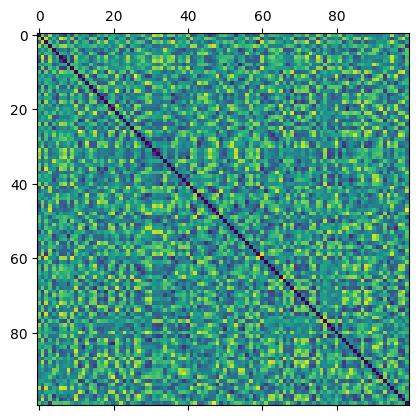

In [12]:
d=T.dissimilarity(b)
plt.matshow(d.numpy())
plt.show()

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


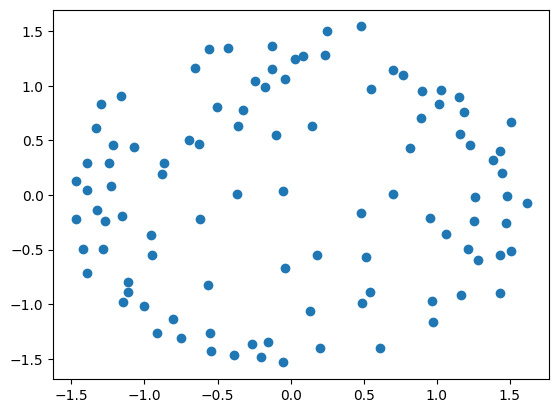

In [13]:
from sklearn.manifold import TSNE,MDS
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(((d+d.transpose(0,1))/2).numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [18]:
from bcmout.ConeSpace import ConeOverM
COverT = ConeOverM(T,1)
print(COverT)
print(COverT._metric)
c=COverT.random(1000,10)
print(torch.all(COverT.belongs(c)))

tensor(True)


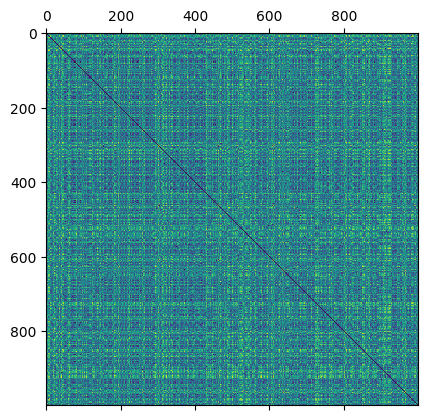

In [19]:
d=COverT.dissimilarity(c)
plt.matshow(d.numpy())
plt.show()
#print(d)

In [20]:

X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(d.numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

ValueError: Input X contains NaN.
MDS does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from MeasureSpace import MeasureSpace
MonT = MeasureSpace(T,4)
print(MonT)
print(MonT._metric)
e = MonT.random(100,20,10)
print(torch.all(MonT.belongs(e)))

In [ ]:
d = MonT.dissimilarity(e,max_steps=10000,eps=.00001)
plt.matshow(d.numpy())
plt.show()
#print(d)

In [ ]:
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(d.numpy())
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()